# Fourier Analysis

This notebook is meant to be a companion to Chapter 10 of Ladefoged's *Elements of Acoustic Phonetics*.

The __[formal definition](https://en.wikipedia.org/wiki/Fourier_analysis)__ of Fourier Analysis includes complex numbers and Euler's formula. That definition applies to the analysis of both real and complex signals. When the signals are real (which is the case for speech signals) -and for the purposes of typical speech processing- the definition can be significantly simplified.

## Discrete-time Signals

Let me casually define a *discrete-time signal* as a list of numbers $x(n)$ corresponding to a sequence of indices $n=0, 1, 2, 3, \ldots, N-1$, with each $x(n)$ generated from the corresponding $n$ via some function. For example, the following code will print the values a signal with $N=10$ and $x(n) = 100+ (n-10)^2$.

In [2]:
for n in range(10):
    x = 100 + (n-10)**2
    print("n =", n ,", x[n] =",x)

n = 0 , x[n] = 200
n = 1 , x[n] = 181
n = 2 , x[n] = 164
n = 3 , x[n] = 149
n = 4 , x[n] = 136
n = 5 , x[n] = 125
n = 6 , x[n] = 116
n = 7 , x[n] = 109
n = 8 , x[n] = 104
n = 9 , x[n] = 101


I can also plot $x$ as a function of $n$, if I am careful to store the values of $n$ and $x$ in *lists*, or *arrays*.  

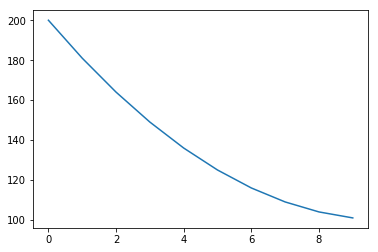

In [3]:
import matplotlib.pyplot as plt

n = [];
x = [];

for i in range(10):
    n.append(i);
    x.append(100 + (i-10)**2)
    
plt.plot(n,x)
plt.show()

I can think of the values $n$ as corresponding to points in time. In particular, the time difference between two time points is $\Delta t = 1/F_s$ where $F_s$ is the *sampling rate* of the signal, which is measured in herz (Hz), which is the another name cycles/sec (i.e. how many full repetitions of the signal do I have during one second?).

# Sinusoids

Sinusoids are sine and cosine signals. Let me define a sine signal of frequency $f$ and amplitude $A$ as $x_{sin}(n) = A\sin(2\pi \dfrac{f}{F_s} n) $

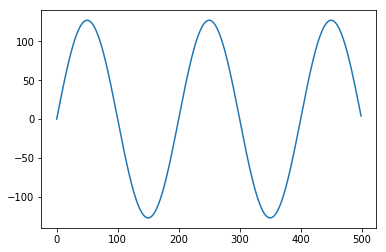

In [4]:
import math

Fs=20000;
f=100;
A=127;

n = [];
xsin = [];

for i in range(500): # Note that it is arbitrary here how many points I can take
    n.append(i);
    xsin.append(A*math.sin(2*math.pi*f/Fs*i));
    
plt.plot(n,xsin)
plt.show()

Same for cosines, say $x_{cos}(n) = A\sin(2\pi \dfrac{f}{F_s}) n$. 

Note what happens if I choose $N=F_s/fs$:

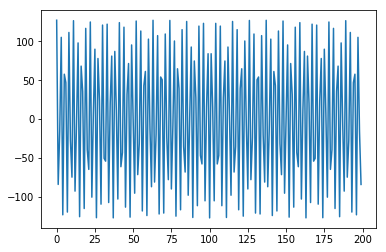

In [60]:
import math

Fs=20000;
f=100;
A=127;

n = [];
xcos = [];

N=round(Fs/f);

for i in range(N): # Note that it is arbitrary here how many points I can take
    n.append(i);
    xcos.append(A*math.cos(2*math.pi*73*f/Fs*i));
    
plt.plot(n,xcos)
plt.show()

What happens when I choose $N=F_s/f$ is that the $N$ points are filled exactly by one repetition, or *period*, of the cosine signal (you can check to see for the sine signal).

What this tells me is that the lowest frequency I can *exactly* represent with N points is $f_{low}=Fs/N$.

The highest frequence is derived from the Nyquist theorem (see chapter 9 in Ladefoged's book) and it is $f_{high}=Fs/2$ (why?).

# Purpose of Fourier Analysis

Let me create a *synthetic* signal as $x(n) = 3\cos(2\pi \dfrac{100}{F_s} n) + 2\sin(2\pi \dfrac{300}{F_s} n) + 4\sin(2\pi \dfrac{500}{F_s} n) + 7\cos(2\pi \dfrac{500}{F_s} n)$. 

*Hint for later:* Note that (from trigonometry!) I can add the last sine and cosine into $(\sqrt{4^2+7^2})cos(2\pi \dfrac{500}{F_s} n +\theta)$, where $\theta$ is the angle with $\tan\theta = 4/7$.

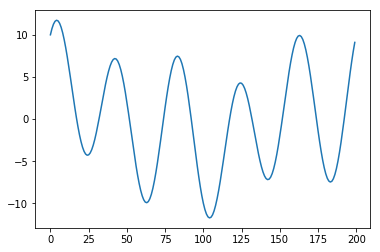

In [7]:
import math

Fs=20000;

n = [];
x = [];

N = round(Fs/f);

for i in range(N): 
    n.append(i);
    x.append(3*math.cos(2*math.pi*100/Fs*i) + 2*math.sin(2*math.pi*300/Fs*i)\
                + 4*math.sin(2*math.pi*500/Fs*i) + 7*math.cos(2*math.pi*500/Fs*i));
    
plt.plot(n,x)
plt.show()

Given the way I created this signal, I can for example, make the following statement:

**Example statement:** My signal has components at frequencies $(100, 300, 500)$ herz with corresponding amplitudes $(3, 2, \sqrt{4^2+7^2})$

In practice, I will be given a signal $x$, and I will want to approximate it as a weighted sum of sinusoids, like in the function for my sythesized signal above. This is the objective of Fourier analysis.

# Fourier Theorem

Let me have a signal $x[n]$, defined over N points (I will assume, without much loss of generality that N is even) with sampling rate $F_s$. 

Let $f_o = f_{low}= Fs/N$. 

Let me construct $N/2$ sinusoids as $\cos(2\pi \dfrac{kf_o}{F_s} n)$ with $k=1,2,\ldots,N/2$. 

Let me construct another $N/2$ sinusoids as $\sin(2\pi \dfrac{kf_o}{F_s} n)$ with $k=1,2,\ldots,N/2$. 

The Fourier theorem says that I can find coefficients $a_k$ and $b_k$m $k=0,1,2,\ldots,N/2-1$ so that:
$$
    x[n] = \sum_{k=1}^{N/2}a_kcos(2\pi \dfrac{kf_o}{F_s} n) + \sum_{k=1}^{N/2}b_ksin(2\pi \dfrac{kf_o}{F_s} n) 
$$

Of course
$$
 \sum_{k=1}^{N/2}a_kcos(2\pi \dfrac{kf_o}{F_s} n) = a_1\cos(2\pi \dfrac{1f_o}{F_s} n) + a_2\cos(2\pi \dfrac{2f_o}{F_s} n) + \ldots + a_{N/2}\cos(2\pi \dfrac{(N/2)f_o}{F_s} n)
$$

and
$$
\sum_{k=1}^{N/2}b_ksin(2\pi \dfrac{kf_o}{F_s} n) = b_1\sin(2\pi \dfrac{1f_o}{F_s} n) + b_2\sin(2\pi \dfrac{2f_o}{F_s} n) + \ldots + b_{N/2}\sin(2\pi \dfrac{(N/2)f_o}{F_s} n)
$$

Fourier analysis gives us a simple recipe for finding $a_k$ and $b_k$. It is:
$$
a_k=\dfrac{2}{N}\sum_{n=0}^{N-1} x[n] cos(2\pi \dfrac{kf_o}{F_s} n) = \dfrac{2}{N}\big(x[0] cos(2\pi \dfrac{kf_o}{F_s} 0) + \dfrac{2}{N}\big(x[1] cos(2\pi \dfrac{kf_o}{F_s} 1) + x[2] cos(2\pi \dfrac{kf_o}{F_s} 2)+\ldots + x[N-1] cos(2\pi \dfrac{kf_o}{F_s} (N-1))\big)
$$

and
$$
b_k=\dfrac{2}{N}\sum_{n=0}^{N-1} x[n] sin(2\pi \dfrac{kf_o}{F_s} n)=  \dfrac{2}{N}\big( x[0] sin(2\pi \dfrac{kf_o}{F_s} 1) + \dfrac{2}{N}\big( x[1] sin(2\pi \dfrac{kf_o}{F_s} 1) + x[2] sin(2\pi \dfrac{kf_o}{F_s} 2)+\ldots + x[N-1] sin(2\pi \dfrac{kf_o}{F_s} (N-1)) \big)
$$

**Note for the mathematically inclined:** If you know your linear algebra, I can tell you that the set of $N$ sinusoids I have selected, scaled by $1/\sqrt{N}$ form an *orthornormal basis* of $R^N$ (and this is why the whole thing works as it does).

# Calculating the Fourier coefficients in Python

Let me consider a fixed value for $k$, say $k=17$ (I can choose anything smaller than $N/2$). I want to calculate $a_{17}$ according to the above. I will create a "buffer" and set its initial value to zero.

In [47]:
k = 87
buffer = 0

I see in my formula that I have to add $N$ elements to this sum. Each element is $x[n] cos(2\pi \dfrac{kf_o}{F_s} n)$ with $n=1,\ldots,n$. I will create a loop over $n$ and in each loop I will add the $n$th element.

In [48]:
for n in range(N):
    buffer = buffer + x[n]*math.sin(2*math.pi*(k*f/Fs)*n)
    
print(buffer/(N/2))

-9.636735853746358e-16


I want to do this for many values of $k$. In fact, for $k=1,2,\ldots,N/2$. I will do another loop that runs for these values. Before that I will create two lists, one for storing the values of $k$, and one for the values $a_k$. Then in every loop I will append to these lists.

This is how it works:

0 1 2.9999999999999996 -5.412337245047638e-16 2.9999999999999996
1 2 -6.394884621840901e-16 -1.113553693699032e-15 1.2841134381421798e-15
2 3 -9.059419880941278e-16 2.0000000000000004 2.0000000000000004
3 4 -2.877698079828406e-15 -7.638334409421077e-16 2.9773457582466897e-15
4 5 6.999999999999999 4.0 8.06225774829855
5 6 -3.4638958368304883e-15 -1.6853185513809876e-15 3.852125775210423e-15
6 7 4.458655666894628e-15 2.042810365310288e-15 4.90435363167775e-15
7 8 3.126388037344441e-15 2.486899575160351e-16 3.1362635181087304e-15
8 9 1.829647544582258e-15 6.039613253960852e-16 1.9267535960703645e-15
9 10 -9.592326932761353e-16 -3.552713678800501e-16 1.022910115643183e-15
10 11 -3.1974423109204507e-16 -6.883382752675971e-16 7.58976913031624e-16
11 12 -1.5276668818842154e-15 -9.992007221626409e-16 1.8254227414974823e-15
12 13 5.684341886080802e-16 3.419486915845482e-16 6.633598830611563e-16
13 14 4.103384299014579e-15 2.4424906541753446e-16 4.110647188869011e-15
14 15 -2.646771690706373e-15

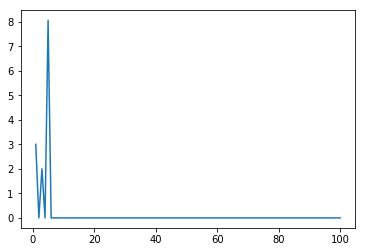

In [61]:
list_k =[];
list_ak=[];
list_bk=[];
list_sk=[];

for i in range(round(N/2)):
    
    k = i+1 #See that here we are right at the point of the previous code snippet
    buffer_ak = 0
    buffer_bk = 0
    
    for n in range(N):
        buffer_ak = buffer_ak + x[n]*math.cos(2*math.pi*(k*f/Fs)*n)
        buffer_bk = buffer_bk + x[n]*math.sin(2*math.pi*(k*f/Fs)*n)
        
    ak = buffer_ak/(N/2)
    bk = buffer_bk/(N/2)
    sk = math.sqrt(ak*ak+bk*bk)
    
    print(i,k,ak,bk,sk)
    
    list_k.append(k)
    list_ak.append(ak)
    list_bk.append(bk)
    list_sk.append(sk)
    
plt.plot(list_k,list_sk)
plt.show()